In [2]:
!pip install torch torchvision torchsummary

    100% |████████████████████████████████| 676.9MB 80kB/s  eta 0:00:01 0% |▏                               | 4.1MB 78.3MB/s eta 0:00:09    19% |██████▏                         | 131.6MB 76.6MB/s eta 0:00:08    29% |█████████▌                      | 201.5MB 78.9MB/s eta 0:00:07    32% |██████████▎                     | 218.4MB 78.3MB/s eta 0:00:06    39% |████████████▋                   | 267.9MB 77.1MB/s eta 0:00:06    55% |█████████████████▊              | 375.2MB 76.4MB/s eta 0:00:04��█▋            | 414.9MB 78.7MB/s eta 0:00:04�████            | 423.3MB 80.3MB/s eta 0:00:04    64% |████████████████████▉           | 439.8MB 78.0MB/s eta 0:00:04|█████████████████████           | 443.6MB 78.5MB/s eta 0:00:03�███▍          | 452.3MB 75.8MB/s eta 0:00:0370.0MB 78.2MB/s eta 0:00:03/s eta 0:00:03       | 478.3MB 75.9MB/s eta 0:00:03█████████████▉         | 482.0MB 81.5MB/s eta 0:00:03      | 485.7MB 77.2MB/s eta 0:00:03▏        | 489.6MB 78.7MB/s eta 0:00:03��██████████████████▍        | 

In [31]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from torchsummary import summary



In [4]:

train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:00, 12243286.93it/s]                           


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 125129.35it/s]           
0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1479292.78it/s]                           
8192it [00:00, 71376.84it/s]            


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


### Batch Data

In [5]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128) 
test_loader = torch.utils.data.DataLoader(test, batch_size=128)

###  Design neural Network aarchitecture

In [6]:
n_input = 784
n_dense_1 = 64
n_dense_2 = 64
n_dense_3 = 64
n_out = 10

In [7]:
model = nn.Sequential(
    
    # first hidden layer: 
    nn.Linear(n_input, n_dense_1), 
    nn.ReLU(), 
    
    # second hidden layer: 
    nn.Linear(n_dense_1, n_dense_2), 
    nn.ReLU(), 
    
    # third hidden layer: 
    nn.Linear(n_dense_2, n_dense_3), 
    nn.ReLU(), 
    nn.Dropout(),  
    
    # output layer: 
    nn.Linear(n_dense_3, n_out) 
)

In [8]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
              ReLU-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 64]           4,160
              ReLU-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 64]           4,160
              ReLU-6                [-1, 1, 64]               0
           Dropout-7                [-1, 1, 64]               0
            Linear-8                [-1, 1, 10]             650
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.23
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


### Configure Training parameters

In [9]:
cost_fxn = nn.CrossEntropyLoss() # includes softmax activation

In [10]:
optimizer = torch.optim.Adam(model.parameters())

In [11]:
# for i in range(len(train)):
#     print ('size of image{} label{}'.format(train[i][0].size(),train[i][1]))
#     if i>4: break

###  Displaying an image

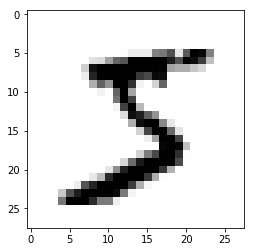

In [32]:
train_image, train_target = train[0]
plt.imshow(train_image[0].numpy().squeeze(), cmap='gray_r');

### lets display more images 

In [ ]:
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images +1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(train_image[index].numpy().squeeze(), cmap='gray_r')

### Train the model

In [44]:
def accuracy_pct(pred_y, true_y):
  _, prediction = torch.max(pred_y, 1) # returns maximum values, indices; fed tensor, dim to reduce
  correct = (prediction == true_y).sum().item()
  return (correct / true_y.shape[0]) * 100.0

In [45]:
n_batches = len(train_loader)
n_batches

469

In [ ]:
n_epochs = 10 

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
  
  avg_cost = 0.0
  avg_accuracy = 0.0
  
  for i, (X, y) in enumerate(train_loader): # enumerate() provides count of iterations  
    
    # forward propagation:
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    cost = cost_fxn(y_hat, y)
    avg_cost += cost / n_batches
    
    # backprop and optimization via gradient descent: 
    optimizer.zero_grad() # set gradients to zero; .backward() accumulates them in buffers
    cost.backward()
    optimizer.step()
    
    # calculate accuracy metric:
    accuracy = accuracy_pct(y_hat, y)
    avg_accuracy += accuracy / n_batches
        
    if (i + 1) % 100 == 0:
      print('Step {}'.format(i + 1))
    
  print('Epoch {}/{} complete: Cost: {:.3f}, Accuracy: {:.1f}% \n'
        .format(epoch + 1, n_epochs, avg_cost, avg_accuracy)) 
  # TO DO: add test metrics

print('Training complete.')

In [47]:


n_test_batches = len(test_loader)
n_test_batches



79

In [ ]:
model.eval() # disables dropout and batch norm

with torch.no_grad(): # disables autograd, reducing memory consumption
  
  avg_test_cost = 0.0
  avg_test_acc = 0.0
  
  for X, y in test_loader:
    
    # make predictions: 
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    
    # calculate cost: 
    cost = cost_fxn(y_hat, y)
    avg_test_cost += cost / n_test_batches
    
    # calculate accuracy:
    test_accuracy = accuracy_pct(y_hat, y)
    avg_test_acc += test_accuracy / n_test_batches

print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

# model.train() # 'undoes' model.eval()